In [ ]:
 # Import Libraries and Data
import pydotplus
import os
import seaborn as sns
import sklearn.model_selection as ms
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier



file_path = '/content/drive/MyDrive/Copy of songs.csv'
df = pd.read_csv(file_path)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [ ]:
# Remove Rows with a Missing Value
display(df.isna().sum())
df = df.dropna()

artist              499
song                499
song_name_len       499
duration_ms         499
explicit            499
year                499
popularity          499
hot                 499
danceability        499
energy              499
key                 499
loudness            499
mode                499
speechiness         499
acousticness        499
instrumentalness    499
liveness            499
valence             499
tempo               499
genre               499
pop                 499
rock                499
hiphop              499
dance               499
folk                499
rnb                 499
latin               499
dtype: int64

In [ ]:
# Preprocessing
df.columns = df.columns.str.replace (' ','_')
df = df[["song_name_len", "duration_ms", "explicit", "danceability", "energy", "key", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "pop", "rock", "hiphop", "dance", "folk", "rnb", "latin", "popularity"]]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularity Distribution')

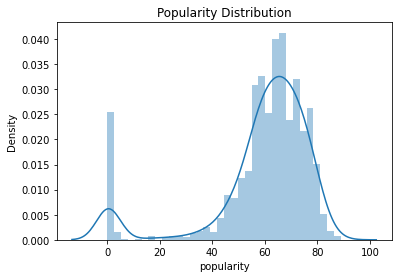

In [ ]:
sns.distplot(df['popularity']).set_title('Popularity Distribution')

In [ ]:
df.loc[df['popularity'] <= 75, 'popularity'] = 0
df.loc[df['popularity'] > 75, 'popularity'] = 1

In [ ]:
# Set Train and Test Sets
X = (df.iloc[:,:-1])
y = (df.iloc[:, -1])
y = y.astype('int')

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.40, random_state = 1)

X_train
X_test
y_train
y_test

91      0
75      0
1264    0
330     0
1349    1
       ..
1462    0
1262    1
1322    1
1142    0
1041    0
Name: popularity, Length: 600, dtype: int64

In [ ]:
# Tree Induction
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=12, min_samples_split = 5, random_state=0)

dt_clf = dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

In [ ]:
# Tree Visualization
import io

import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz
import matplotlib as mpl



def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z

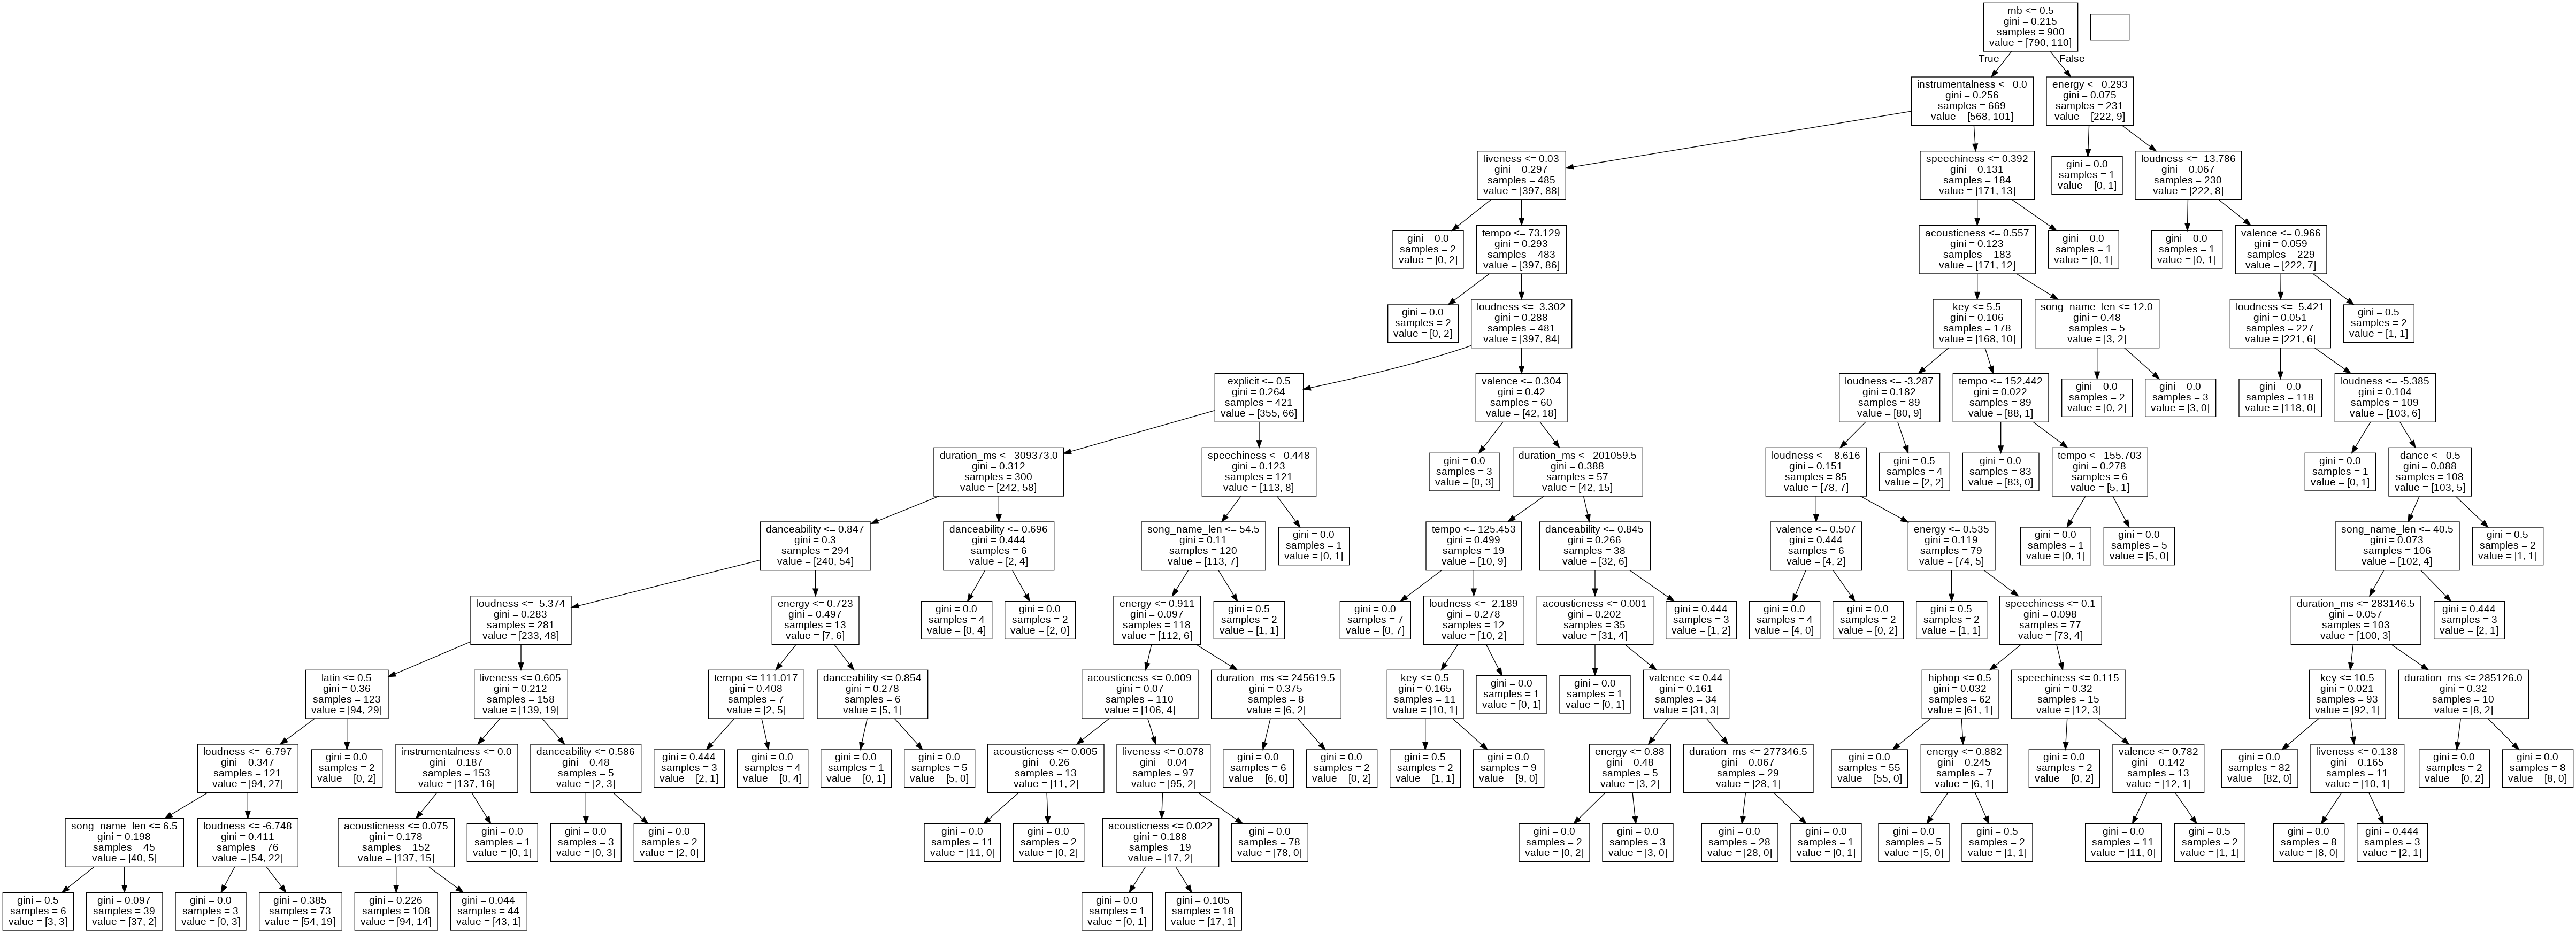

In [ ]:
feature_names = df.columns.tolist()
feature_names = feature_names[0:20]
target_name = np.array(['Not_Popular', 'Popular'])

dt_dot_data = tree.export_graphviz(dt_clf, out_file = None,
                                  feature_names = feature_names,
                                  class_names = target_name,
                                  filled = True, rounded = True,
                                  special_characters = True)

dt_graph = pydotplus.graph_from_dot_data
draw_decision_tree(dt_clf)

In [ ]:
import sklearn.metrics as mt

print('Train_Accuracy: ', dt_clf.score(X_train, y_train),'\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred)
precision = mt.precision_score(y_test, y_pred)
f1_score = mt.f1_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy:  0.9411111111111111 

Accuracy:  0.81 

Recall:  0.09 

Precision:  0.14 

F1_score:  0.11 

Confusion Matrix: 
 [[476  42]
 [ 75   7]]


In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import cross_val_predict

y_pred_cross = cross_val_predict(dt_clf, X, y, cv=10)
accuracy = mt.accuracy_score(y, y_pred_cross)
recall = mt.recall_score(y, y_pred_cross)
precision = mt.precision_score(y, y_pred_cross)
f1_score = mt.f1_score(y, y_pred_cross)
matrix = mt.confusion_matrix(y, y_pred_cross)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

#Cross validation

Accuracy:  0.80 

Recall:  0.14 

Precision:  0.17 

F1_score:  0.15 

Confusion Matrix: 
 [[1178  130]
 [ 166   26]]


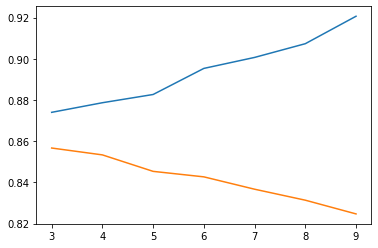

In [ ]:

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


mean_test_accuracy = []
train_accuracy = []
for max_depth in np.arange(3, 10):
    model1 = DecisionTreeClassifier(max_depth=max_depth).fit(X, y)
    train_accuracy.append(accuracy_score(y, model1.predict(X)))
    mean_test_accuracy.append(cross_val_score(model1, X, y, scoring="accuracy", cv=5).mean())


plt.plot(np.arange(3, 10), train_accuracy)
plt.plot(np.arange(3, 10), mean_test_accuracy)
plt.show()
# Paremeter Pruning

In [ ]:
from sklearn.model_selection import GridSearchCV

t_clf = DecisionTreeClassifier(random_state=0)
parameters = {'max_depth': [4, 8, 12],
              'min_samples_split': [5, 10, 15],
              'splitter': ['best', 'random'],}

grid_dt = GridSearchCV(dt_clf, param_grid = parameters, cv = 5 )

grid_dt.fit(X_train, y_train)

result = pd.DataFrame(grid_dt.cv_results_['params'])
result['mean_test_score'] = grid_dt.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,max_depth,min_samples_split,splitter,mean_test_score
5,4,15,random,0.875556
3,4,10,random,0.875556
1,4,5,random,0.875556
9,8,10,random,0.864444
11,8,15,random,0.862222
0,4,5,best,0.857778
4,4,15,best,0.856667
2,4,10,best,0.854444
17,12,15,random,0.851111
7,8,5,random,0.848889


In [ ]:
# Tree Optimization
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split = 15, random_state=0)

dt_clf = dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

In [ ]:
# Validation
import sklearn.metrics as mt

print('Train_Accuracy: ', dt_clf.score(X_train, y_train),'\n')

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred)
precision = mt.precision_score(y_test, y_pred)
f1_score = mt.f1_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy:  0.8855555555555555 

Accuracy:  0.85 

Recall:  0.00 

Precision:  0.00 

F1_score:  0.00 

Confusion Matrix: 
 [[510   8]
 [ 82   0]]


In [ ]:
# Cross-Validation
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import cross_val_predict

y_pred_cross = cross_val_predict(dt_clf, X, y, cv=10)
accuracy = mt.accuracy_score(y, y_pred_cross)
recall = mt.recall_score(y, y_pred_cross)
precision = mt.precision_score(y, y_pred_cross)
f1_score = mt.f1_score(y, y_pred_cross)
matrix = mt.confusion_matrix(y, y_pred_cross)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.86 

Recall:  0.02 

Precision:  0.12 

F1_score:  0.04 

Confusion Matrix: 
 [[1280   28]
 [ 188    4]]


Logistic regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
from sklearn.metrics import confusion_matrix
import statsmodels.api as ms

# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = (df.iloc[:,:-1])
y = (df.iloc[:, -1])
y = y.astype('int')

X = scaler.fit_transform(X)

In [ ]:
# Set Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

In [ ]:
# Model Fit
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as mt

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Train_Accuracy: ', model.score(X_train, y_train),'\n')

Train_Accuracy:  0.8777777777777778 



In [ ]:
# Visualization Using Table
model = ms.Logit(y_train, X_train)
results = model.fit(method = "newton")
features = list(df.iloc[:, 0:-1].columns)
results.summary(xname=features)

Optimization terminated successfully.
         Current function value: 0.679692
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             popularity   No. Observations:                  900
Model:                          Logit   Df Residuals:                      880
Method:                           MLE   Df Model:                           19
Date:                Mon, 07 Nov 2022   Pseudo R-squ.:                 -0.8304
Time:                        19:44:30   Log-Likelihood:                -611.72
converged:                       True   LL-Null:                       -334.20
Covariance Type:            nonrobust   LLR p-value:                     1.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
song_name_len       -0.1012      0.070     -1.444      0.149      -0.239       0.036
duration_ms          0.0123      0.071      0.173      0.862      -0.127       0.151
explicit            -0.1426      0.082     -1.730      0.084      -0.304       0.019
danceability         0.0264      0.087      0.303      0.762      -0.144       0.197
energy              -0.1099      0.103     -1.062      0.288      -0.313       0.093
key                 -0.0699      0.069     -1.016      0.309      -0.205       0.065
loudness             0.1612      0.088      1.822      0.068      -0.012       0.335
speechiness          0.0199      0.082      0.244      0.807      -0.140       0.180
acousticness         0.0118      0.077      0.153      0.878      -0.140       0.163
instrumentalness    -0.0605      0.077     -0.790      0.430      -0.211       0.090
liveness            -0.0026      0.070     -0.036      0.971      -0.140       0.135
valence             -0.0559      0.087     -0.646      0.518      -0.225       0.114
tempo               -0.0698      0.071     -0.979      0.327      -0.209       0.070
pop                 -0.0598      0.073     -0.822      0.411      -0.202       0.083
rock                 0.0544      0.077      0.710      0.477      -0.096       0.204
hiphop               0.0695      0.086      0.811      0.417      -0.098       0.237
dance               -0.0643      0.075     -0.858      0.391      -0.211       0.083
folk                -0.0691      0.061     -1.125      0.261      -0.189       0.051
rnb                 -0.2094      0.077     -2.709      0.007      -0.361      -0.058
latin                0.0232      0.070      0.329      0.742      -0.115       0.161
====================================================================================
"""

In [ ]:
# Test
accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred)
precision = mt.precision_score(y_test, y_pred)
f1_score = mt.f1_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.86 

Recall:  0.01 

Precision:  1.00 

F1_score:  0.02 

Confusion Matrix: 
 [[518   0]
 [ 81   1]]


In [ ]:
# Cross-Validation
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import cross_val_predict

model = LogisticRegression()

y_pred_cross = cross_val_predict(model, X, y, cv=10)
accuracy = mt.accuracy_score(y, y_pred_cross)
recall = mt.recall_score(y, y_pred_cross)
precision = mt.precision_score(y, y_pred_cross)
f1_score = mt.f1_score(y, y_pred_cross)
matrix = mt.confusion_matrix(y, y_pred_cross)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.87 

Recall:  0.00 

Precision:  0.00 

F1_score:  0.00 

Confusion Matrix: 
 [[1307    1]
 [ 192    0]]


KNN models


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = (df.iloc[:,:-1])
y = (df.iloc[:, -1])
y = y.astype('int')

X = scaler.fit_transform(X)

# Set Train and Test Set
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.4, random_state = 1)

# Model Fit
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 31)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Train_Accuracy: ', model.score(X_train, y_train),'\n')

Train_Accuracy:  0.8777777777777778 



In [ ]:
# Test
import sklearn.metrics as mt

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred)
precision = mt.precision_score(y_test, y_pred)
f1_score = mt.f1_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.86 

Recall:  0.00 

Precision:  0.00 

F1_score:  0.00 

Confusion Matrix: 
 [[518   0]
 [ 82   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Cross-Validation
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import cross_val_predict

model = KNeighborsClassifier(n_neighbors = 3)

y_pred_cross = cross_val_predict(model, X, y, cv=10)
accuracy = mt.accuracy_score(y, y_pred_cross)
recall = mt.recall_score(y, y_pred_cross)
precision = mt.precision_score(y, y_pred_cross)
f1_score = mt.f1_score(y, y_pred_cross)
matrix = mt.confusion_matrix(y, y_pred_cross)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.84 

Recall:  0.13 

Precision:  0.25 

F1_score:  0.17 

Confusion Matrix: 
 [[1232   76]
 [ 167   25]]


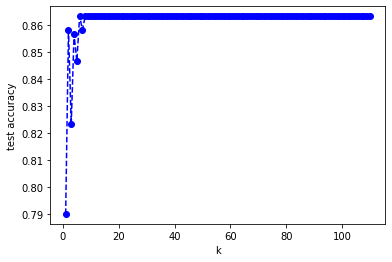

In [ ]:
# Parameter Tuning
import matplotlib.pyplot as plt

k_range = range(1,111)

accuracy_list = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_list.append(mt.accuracy_score(y_test, y_pred))

# k = sqrt(N)

plt.plot(k_range, accuracy_list, 'o--', color = 'blue')
plt.xlabel("k")
plt.ylabel("test accuracy")
plt.show()

In [ ]:
# Model Optimization
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Train_Accuracy: ', model.score(X_train, y_train),'\n')

Train_Accuracy:  0.89 



In [ ]:
# Test
import sklearn.metrics as mt

accuracy = mt.accuracy_score(y_test, y_pred)
recall = mt.recall_score(y_test, y_pred)
precision = mt.precision_score(y_test, y_pred)
f1_score = mt.f1_score(y_test, y_pred)
matrix = mt.confusion_matrix(y_test, y_pred)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.85 

Recall:  0.02 

Precision:  0.14 

F1_score:  0.04 

Confusion Matrix: 
 [[506  12]
 [ 80   2]]


In [ ]:
# Cross-Validation
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import cross_val_predict

model = KNeighborsClassifier(n_neighbors = 3)

y_pred_cross = cross_val_predict(model, X, y, cv=10)
accuracy = mt.accuracy_score(y, y_pred_cross)
recall = mt.recall_score(y, y_pred_cross)
precision = mt.precision_score(y, y_pred_cross)
f1_score = mt.f1_score(y, y_pred_cross)
matrix = mt.confusion_matrix(y, y_pred_cross)

print('Accuracy: ', format(accuracy,'.2f'),'\n')
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Accuracy:  0.84 

Recall:  0.13 

Precision:  0.25 

F1_score:  0.17 

Confusion Matrix: 
 [[1232   76]
 [ 167   25]]
